In [100]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("future.no_silent_downcasting", True)


In [99]:
predicting_data = pd.read_csv("pickleball game.csv")
predicting_data = predicting_data.filter(["score_w", "skill_lvl"])
predicting_data = predicting_data.dropna()
predicting_data = predicting_data.drop(predicting_data[predicting_data.score_w < 11].index)
predicting_data["skill_lvl"] = predicting_data.skill_lvl.replace({"Pro": 6})
predicting_data["skill_lvl"] = predicting_data.skill_lvl.replace({"Senior Pro": 5.5})
predicting_data["skill_lvl"] = pd.to_numeric(predicting_data["skill_lvl"])
predicting_data["score_w"] = pd.to_numeric(predicting_data["score_w"])
predicting_data["score_w"] = pd.to_numeric(predicting_data["score_w"])


In [77]:
predicting_data

,score_w,skill_lvl
0,12,6.0
2,15,3.5
3,11,4.5
4,11,4.5
5,15,4.5
...,...,...
930,11,5.0
931,11,5.0
932,15,4.0
933,11,4.5


normalizing the data because some of the rows had NaN values and had to convert strings to ints.

In [78]:
train = predicting_data.sample(frac=.8)
test = predicting_data.drop(index= train.index)

In [79]:
predicting_datam1 = predicting_data.groupby("score_w")["skill_lvl"].mean()



In [80]:
print(predicting_datam1)

score_w
11    4.601770
12    4.709677
13    4.442308
14    4.200000
15    4.390625
16    4.944444
17    4.750000
19    5.000000
20    5.333333
21    4.865079
22    4.722222
23    4.500000
24    4.000000
25    5.809524
26    6.000000
27    6.000000
28    6.000000
32    6.000000
Name: skill_lvl, dtype: float64


In [81]:
y_train = train["score_w"] 
X_train = train.drop(columns=["score_w"])
print(X_train.shape, y_train.shape)

y_test = test["score_w"]
X_test = test.drop(columns=["score_w"])
print(X_test.shape, y_test.shape)
print(X_train.columns)


(734, 1) (734,)
(184, 1) (184,)
Index(['skill_lvl'], dtype='object')


MSE: 11.983742940822317
R² Score: 0.014655278843586084


Text(0.5, 1.0, 'Linear Regression: Skill Level vs Winning Score')

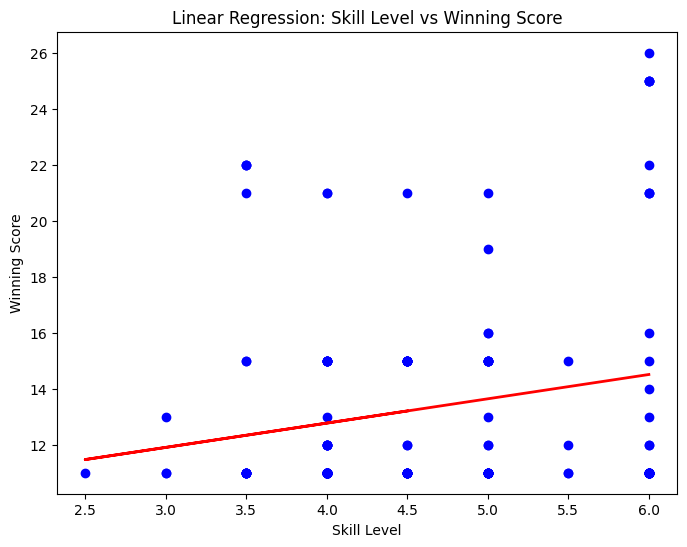

In [108]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.xlabel("Skill Level")
plt.ylabel("Winning Score")
plt.title("Linear Regression: Skill Level vs Winning Score")



In [90]:
print(log_reg.classes_)

[11 12 13 14 15 16 17 19 20 21 22 23 24 25 26 27 28 32]
